#### 归一化 normalization

##### 归一化的目的

MSE损失函数是凸函数

<img src="./Img/10.png" width="40%" height="40%">   

如果样本的值X1 << X2，那么最终θ1 >> θ2

θ1和θ2数值在一开始初始化是差不多的，但是由于X1和X2的关系，我们会发现θ1从初始值到目标位置的距离要远大于θ2从初始值到目标位置，这也是第二幅图扁平的原因

每次调整θ1的幅度要远小于θ2的幅度

总结：归一化的目的是使得最终梯度下降的时候可以不同维度θ参数可以在接近的调整幅度上。

扩展：归一化可以提高精度，主要在距离计算上，样本之间的数量级不同会导致偏向性，所以归一化后就没这个问题了

##### 最大值最小值归一化

min max scaling，针对每一列，每一列取出最大最小值，然后对这一列中每个数值按公式操作

$ X_{\text{norm}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}} $

* $X$ 是原始数据点。
* $X_{min}$ 是数据集中的最小值。
* $X_{max}$ 是数据集中的最大值。
* $X_{norm}$ 是归一化后的数据点。


优点是一定可以把数值归一到0到1之间，缺点是如果有一个离群值，影响会比较大

##### 标准归一化

也是按照列来做的，求出每一列的均值和标准差

标准归一化包含了均值归一化和方差归一化，经过处理的函数符合标准正态分布，即均值为0，标准差为1，其转化函数为： 
$$
X_{\text{norm}} = \frac{X - \mu}{\sigma}
$$

方差归一化：标准差的计算会考虑到所有的样本数据，所以受到离群值的影响会小了一些。  
均值归一化：当我们梯度下降的时候，能够有更多的方向可以调整

数据不一定会缩放到0到1之间了

In [3]:
from sklearn.preprocessing import StandardScaler
import numpy as np

temp = np.array([1,2,3,5,5])
temp = temp.reshape(-1,1)
temp


array([[1],
       [2],
       [3],
       [5],
       [5]])

In [4]:
scaler = StandardScaler()
scaler.fit(temp) # fit 方法计算数据的均值和标准差

StandardScaler()

In [5]:
scaler.mean_

array([3.2])

In [6]:
scaler.var_

array([2.56])

In [7]:
scaler.transform(temp) # 对数据进行标准化

array([[-1.375],
       [-0.75 ],
       [-0.125],
       [ 1.125],
       [ 1.125]])

In [8]:
data = np.array([1,2,3,5,50001]).reshape(-1,1)

In [9]:
data

array([[    1],
       [    2],
       [    3],
       [    5],
       [50001]])

In [10]:
scaler.fit(data)

StandardScaler()

In [11]:
scaler.mean_

array([10002.4])

In [12]:
scaler.var_

array([3.99972002e+08])

In [13]:
scaler.transform(data)

array([[-0.5000875 ],
       [-0.5000375 ],
       [-0.4999875 ],
       [-0.49988749],
       [ 2.        ]])

##### 强调

在做特征工程的时候，对训练集做归一化后，测试集也同样需要做归一化，但是它的均值和方差要使用训练集的

#### 正则化 regularization

##### 过拟合和欠拟合

（1）under fit：还没有拟合到位，训练集和测试集的准确率都还没达到最高。学的还不到位。  
（2）over fit：拟合过度，训练集的准确率升高的同时，测试集的准确率反而降低。学的过度了，做过的卷子都能再次答对，考试碰到新题就不会了   
（3）just right：过拟合前训练集和测试集准确率都达到最高时刻。学习并不需要花费很多时间，理解的很好。

<img src="./Img/11.png" width="40%" height="40%">   

正则化就是防止过拟合，具有更好的鲁棒性（robust），也就是模型的泛化能力和推广能力更强。想要有一定的容错率又要保证正确率就要由正则项来决定。

正则化的本质就是牺牲模型在训练集上的正确率来提高推广能力，W在数值上越小越好，这样能抵抗数值的扰动。同时为了保证模型的正确率，W又不能极小。

因此在损失函数的后面加上一个惩罚项，使得计算出来的模型W相对小一些，带来泛化能力。

$$Loss = MSE + 正则项$$

原来的损失函数是保证MSE最小，找到使得训练集正确率最高的参数。但是我们需要的是测试集上的准确率越高，因此MSE和正则项都得小

（回归的损失函数一般是MSE，分类的话一般是cross entropy交叉熵）

##### 常用的惩罚项

其实L1和L2正则的公式数学里面的意义就是范数，代表空间中向量到原点的距离，W整体越小越好

##### L1正则项

参数距离原点的曼哈顿距离

$$\sum_{i=1}^{n} |w_i|$$

在线性回归中，包含L1正则项的损失函数可以是：
$$\frac{1}{2m} \sum_{j=1}^{m} (y_j - \hat{y_j})^2 + \lambda \sum_{i=1}^{n} |w_i|$$
其中$ \lambda $是正则化系数，控制惩罚项的权重，m表示样本数量  
这个就是Lasso回归

In [5]:
import numpy as np
from sklearn.linear_model import Lasso

x = 2*np.random.rand(100,1)
y = 4 + 3*x + np.random.rand(100,1)

# alpha 是正则化强度的超参数，用于控制 L2 正则化项的权重
# max_iter 是最大迭代次数
# alpha调大会更关注泛化能力，会牺牲一些准确率
ridge_reg = Lasso(alpha=0.15,max_iter=30000)
ridge_reg.fit(x,y)
print(ridge_reg.predict([[1.5]]))

# 打印模型的截距和系数
print(ridge_reg.intercept_)
print(ridge_reg.coef_)

[8.85696912]
[5.05414109]
[2.53521868]


##### L2正则项

参数距离原点的欧式距离

$$\sum_{i=1}^{n} w_i^2$$

在线性回归中，包含L2正则项的损失函数可以是：
$$\frac{1}{2m} \sum_{j=1}^{m} (y_j - \hat{y_j})^2 + \frac{\lambda}{2} \sum_{i=1}^{n} w_i^2$$
这个就是Ridge岭回归

In [4]:
import numpy as np
from sklearn.linear_model import Ridge

x = 2*np.random.rand(100,1)
y = 4 + 3*x + np.random.rand(100,1)

# alpha 是正则化强度的超参数，用于控制 L2 正则化项的权重
# solver 参数指定了用于优化的算法。sag'：使用随机平均梯度下降法
# alpha调大会更关注泛化能力，会牺牲一些准确率
ridge_reg = Ridge(alpha=0.0004,solver='sag')
ridge_reg.fit(x,y)
print(ridge_reg.predict([[1.5]]))

# 打印模型的截距和系数
print(ridge_reg.intercept_)
print(ridge_reg.coef_)

[[8.90842188]]
[4.60162269]
[[2.87119946]]


##### L1稀疏L2平滑

L1正则会使得计算出来的模型有的W趋近于0，有的W相对较大，而L2会使得W参数整体变小。

我们可以看到菱形的交点更多可能在坐标轴上，会导致一些参数值为0，这也是为什么L1稀疏的原因

<img src="./Img/12.png" width="40%" height="40%">   

事实上，我们使用了新的损失函数后，我们的目标不在是原来的照趋近于圆心的点，而是变成了找两个图形的交点，找出哪个满足总损失函数最小的那个交点就是我们想要的参数。

##### ElasticNet回归

$$ ElasticNet 损失函数 = \frac{1}{2m} \sum_{i=1}^{m} \left( y_i - \hat{y_i} \right)^2 + \alpha \left( \frac{1 - \text{l1\_ratio}}{2} \sum_{j=1}^{n} w_j^2 + \text{l1\_ratio} \sum_{j=1}^{n} |w_j| \right) $$

α 是正则化强度的超参数。  
l1_ratio 是 L1 正则项的权重比率，介于 0 和 1 之间。

In [6]:
import numpy as np
from sklearn.linear_model import ElasticNet

x = 2*np.random.rand(100,1)
y = 4 + 3*x + np.random.rand(100,1)

# alpha 是正则化强度的超参数，用于控制 L2 正则化项的权重
# solver 参数指定了用于优化的算法。sag'：使用随机平均梯度下降法
# alpha调大会更关注泛化能力，会牺牲一些准确率
ridge_reg = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000)
ridge_reg.fit(x,y)
print(ridge_reg.predict([[1.5]]))

# 打印模型的截距和系数
print(ridge_reg.intercept_)
print(ridge_reg.coef_)

[8.76029894]
[5.1218699]
[2.42561936]


####

#### 升维  polynomial regression

升维的目的是解决欠拟合的问题，也可以提高模型的准确率，因为维度不够时，也就是预测结果考虑的因素少的话，肯定不能计算出准确的模型

升维的最常见手段是将已知维度进行相乘来构建新的维度

多项式回归是升维的一种，实现的是Data非线性-->Data线性的过程  
例如，原有的数据集有两个维度x1,x2，那么使用多元线性回归公式就是  
$\hat{y} = w_0 + w_1x_1 + w_2x_2$  
当我们使用二阶多项式升维的时候，数据集就从原来的x1,x2扩展成了x1,x2,x1^2,x2^2,x1x2，因此多元线性回归就得多计算三个维度所对应的W值，  
$\hat{y} = w_0 + w_1x_1 + w_2x_2 + w_3x_1^2 + w_4x_2^2 + w_5x_1x_2$

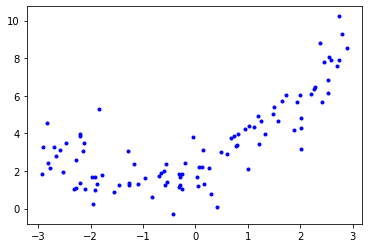

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

np.random.seed(40)
m=100
x=6*np.random.rand(m,1) - 3
y=0.5*x**2 + x + 2 + np.random.randn(m,1)
plt.plot(x,y,'b.')
plt.show()

In [8]:
x_train = x[:80]
y_train = y[:80]
x_test = x[80:]
y_test = y[80:]

[-0.55387783]
[ 1.         -0.55387783]
(80, 1)
(80, 2)
0.0 [[3.47963294 0.90900589]]
2.8465090916990134
1.6413296587819022
[-0.55387783]
[ 1.         -0.55387783  0.30678065]
(80, 1)
(80, 3)
0.0 [[1.94693516 0.95916707 0.48308844]]
1.0219608664434772
0.9072838770832732
[-0.55387783]
[ 1.         -0.55387783  0.30678065 -0.169919    0.09411437 -0.05212786
  0.02887247 -0.01599182  0.00885751 -0.00490598  0.00271731]
(80, 1)
(80, 11)
0.0 [[ 1.48380909e+00  8.16401416e-01  2.13409401e+00  7.61517798e-01
  -9.58943688e-01 -4.28492482e-01  1.88330342e-01  7.46991218e-02
  -1.30996093e-02 -4.06988087e-03  1.79767968e-04]]
0.8687404790416766
1.1973913367066475


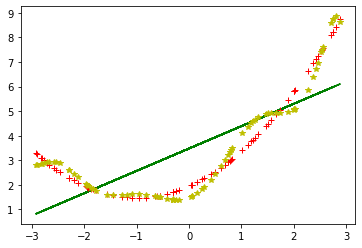

In [13]:
# d 字典中的键表示多项式特征转换的阶数，1阶，2阶和10阶
d = {1: 'g-', 2: 'r+',10: 'y*'}
for i in d:
    # degree=i 指定了多项式的阶数为当前循环的阶数 i，include_bias=True 表示是否包含截距项
    poly_features = PolynomialFeatures(degree=i,include_bias=True)
    # 对训练集 x_train 和测试集 x_test 进行多项式特征转换
    x_poly_train = poly_features.fit_transform(x_train)
    x_poly_test = poly_features.fit_transform(x_test)
    print(x_train[0])
    print(x_poly_train[0])
    print(x_train.shape)
    print(x_poly_train.shape)

    lin_reg = LinearRegression(fit_intercept=False)
    lin_reg.fit(x_poly_train,y_train)
    print(lin_reg.intercept_,lin_reg.coef_)

    # 看看是否随着degree的增加升维，是否过拟合了
    y_train_predict = lin_reg.predict(x_poly_train)
    y_test_predict = lin_reg.predict(x_poly_test)

    plt.plot(x_poly_train[:,1],y_train_predict,d[i])

    print(mean_squared_error(y_train,y_train_predict))
    print(mean_squared_error(y_test,y_test_predict))
plt.show()